Principal Component Analysis
This is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated. This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data. 

One of the most common applications of PCA is visualizing high-dimensional datasets. If we want to look at the Breast Cancer dataset, using a pair plot is tricky. This dataset has 30 features, which would result in 30*14 = 420 scatter plots. 

Before we apply PCA to the Breast Cancer dataset, we scale our data so that each feature has unit variance using StandardScaler:

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

We instantiate the PCA object, ,find the principal components by calling the fit method, and then apply the rotation and dimensionality reduction by calling transform. By default, PCA only rotates (and shifts) the data, but keeps all principal components. To reduce the dimensionality of the data, we need to specify how many compoenents we want to keep when creating the PCA object.

In [3]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit the PCA model to breast cancer data
pca.fit(X_scaled)
        
# transform the data onto the first two principal components
X_pca = pca.transform(X_scaled)
print('Original shape: {}'.format(str(X_scaled.shape)))
print('Reduced shape: {}'.format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second PC')

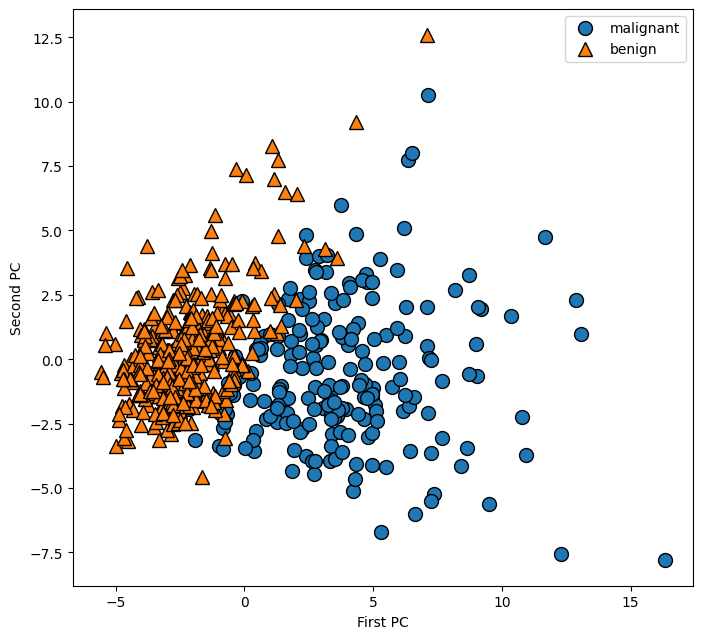

In [4]:
# We can now plot the first two principal components
import matplotlib.pyplot as plt
import mglearn

plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('First PC')
plt.ylabel('Second PC')
